# Does half of the population of Spain need a car? 

In [1]:
import pandas as pd
import numpy as np
import pathlib
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
path = pathlib.Path().parent.absolute()

## Population data

In [3]:
population_data = pd.read_excel(f'{path}/data/pobmun21.xlsx', header=1)

In [4]:
population_data.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB21,HOMBRES,MUJERES
0,2,Albacete,1,Abengibre,748,365,383
1,2,Albacete,2,Alatoz,496,272,224
2,2,Albacete,3,Albacete,172722,84365,88357
3,2,Albacete,4,Albatana,681,354,327
4,2,Albacete,5,Alborea,670,350,320


In [5]:
population_data.dtypes

CPRO          int64
PROVINCIA    object
CMUN          int64
NOMBRE       object
POB21         int64
HOMBRES       int64
MUJERES       int64
dtype: object

### Missing value: None

<AxesSubplot:>

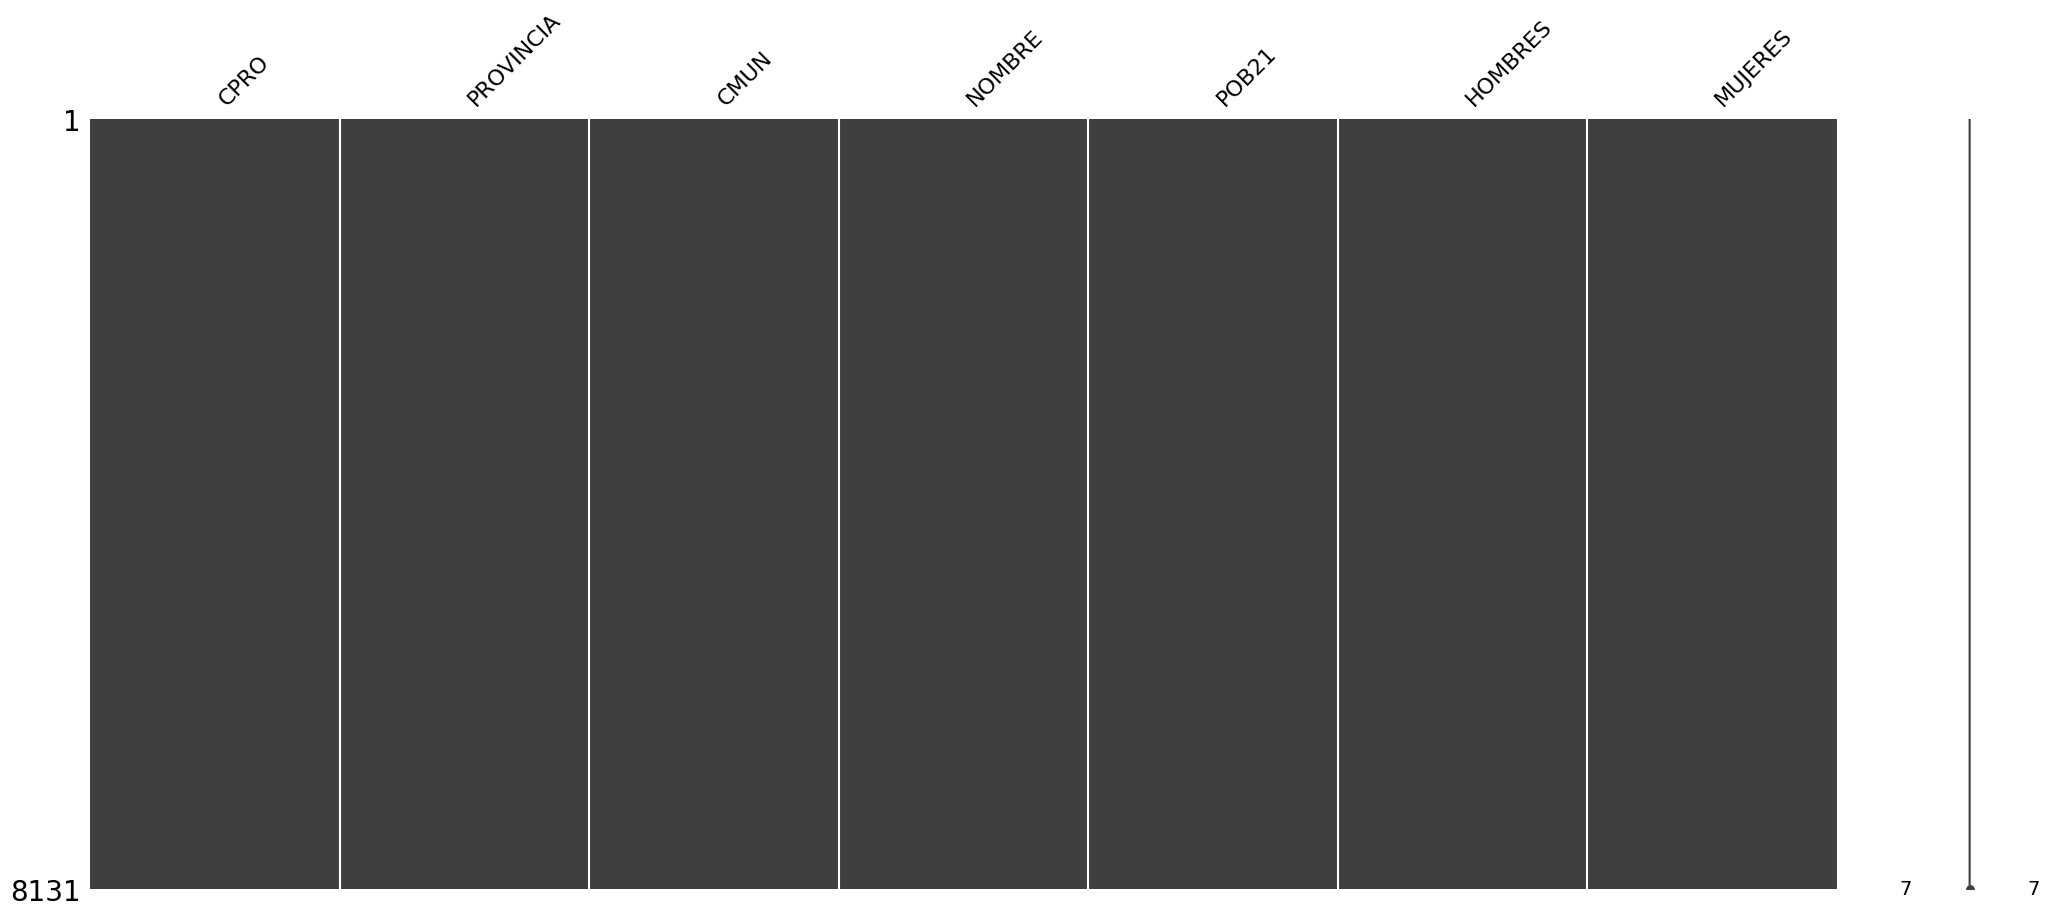

In [6]:
msno.matrix(population_data)

### Stats

In [7]:
total_population = population_data["POB21"].sum()
print(f'the total population is: {total_population}')

the total population is: 47385107


In [8]:
population_data.describe()

,CPRO,CMUN,POB21,HOMBRES,MUJERES
count,8131.000000,8131.000000,8.131000e+03,8.131000e+03,8.131000e+03
mean,26.657115,131.071578,5.827710e+03,2.856100e+03,2.971609e+03
std,14.893232,145.940790,4.784572e+04,2.256291e+04,2.528956e+04
min,1.000000,1.000000,3.000000e+00,3.000000e+00,0.000000e+00
25%,13.000000,43.000000,1.530000e+02,8.400000e+01,6.900000e+01
50%,26.000000,95.000000,5.230000e+02,2.760000e+02,2.480000e+02
75%,41.000000,176.000000,2.416000e+03,1.218000e+03,1.191000e+03
max,52.000000,916.000000,3.305408e+06,1.540894e+06,1.764514e+06


In [9]:
print(f' Skewness :{skew(population_data["POB21"], axis=0, bias=True)}')
print(f' Kurtosis :{kurtosis(population_data["POB21"], axis=0, bias=True)}')

 Skewness :47.41815348407572
 Kurtosis :2971.2310952120797


##### Conclusion 1: None symetric & long tail

### Outliers

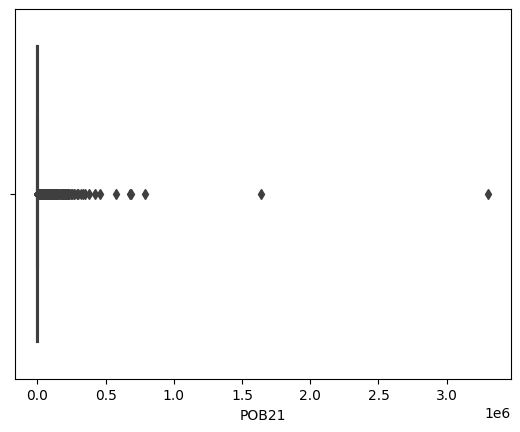

In [10]:
ax = sns.boxplot(x=population_data["POB21"])

In [11]:
q_hi  = population_data["POB21"].quantile(0.99)
print(f"95 Quantile: {q_hi} ")
population_data_filtered = population_data[population_data["POB21"] < q_hi]
population_data_outlier = population_data[population_data["POB21"] >= q_hi]

95 Quantile: 84019.0 


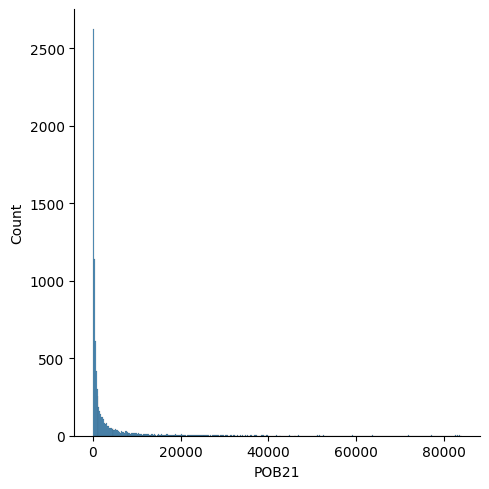

In [12]:
sns.displot(population_data_filtered, x="POB21")

In [13]:
population_data_filtered.shape

(8049, 7)

In [14]:
total_in_none_outliers = population_data_filtered["POB21"].sum()

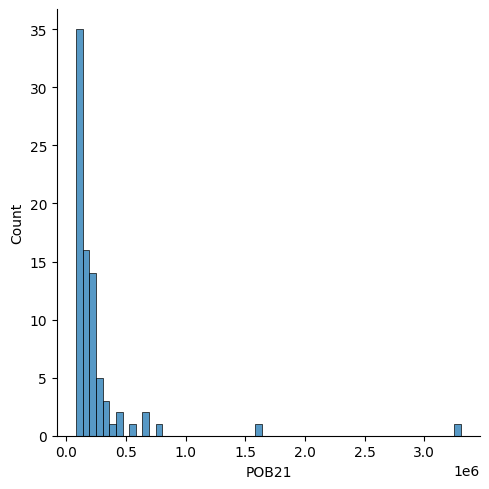

In [15]:
sns.displot(population_data_outlier, x="POB21")

In [16]:
population_data_outlier.shape

(82, 7)

In [17]:
total_in_outliers = population_data_outlier["POB21"].sum()

##### Conlusion 2: More people live in none outlier areas

In [18]:
print(f'Being {total_population} the total population: {total_in_outliers}, {total_in_outliers/total_population * 100} % lives in outlier cities, while  {total_in_none_outliers}, {total_in_none_outliers/total_population * 100} % lives in none outlier areas')

Being 47385107 the total population: 20619986, 43.51575274484449 % lives in outlier cities, while  26765121, 56.48424725515551 % lives in none outlier areas


### Closer look

In [19]:
population_data_outlier.describe()

,CPRO,CMUN,POB21,HOMBRES,MUJERES
count,82.000000,82.000000,8.200000e+01,8.200000e+01,8.200000e+01
mean,24.012195,79.451220,2.514632e+05,1.202809e+05,1.311824e+05
std,13.746824,72.314838,4.012241e+05,1.878282e+05,2.134337e+05
min,1.000000,1.000000,8.402500e+04,4.075300e+04,4.263600e+04
25%,11.000000,24.000000,1.021412e+05,4.956100e+04,5.265100e+04
50%,28.000000,62.000000,1.544090e+05,7.452950e+04,8.061950e+04
75%,32.750000,112.750000,2.230098e+05,1.090982e+05,1.160390e+05
max,52.000000,297.000000,3.305408e+06,1.540894e+06,1.764514e+06


In [20]:
print(f' Skewness :{skew(population_data_outlier["POB21"], axis=0, bias=True)}')
print(f' Kurtosis :{kurtosis(population_data_outlier["POB21"], axis=0, bias=True)}')

 Skewness :6.034423286489228
 Kurtosis :40.81587320547154


The tail is still very long

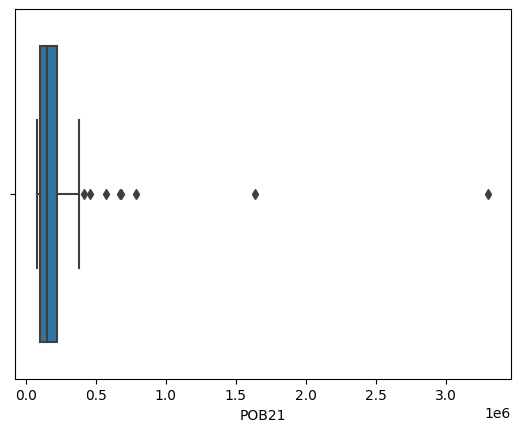

In [21]:
ax = sns.boxplot(x=population_data_outlier["POB21"])

In [22]:
grid = [0, 5000, 10000, 50000, 100000, 500000, 1000000]
for pos in range(0, len(grid)-1, 1): 
    grid[pos: pos + 2]
    threshold, next_threshold = grid[pos: pos + 2][0], grid[pos: pos + 2][1]
    data = population_data[(population_data["POB21"] >= threshold) & (population_data["POB21"] < next_threshold)]
    print(f'The number of towns with less than {next_threshold} are {data.shape[0]}, with the total of {data["POB21"].sum()} people representing {round(data["POB21"].sum() / total_population * 100, 3)} % of the population')
data = population_data[(population_data["POB21"] >= 1000000)]
print(f'The number of towns with less than {next_threshold} are {data.shape[0]}, with the total of {data["POB21"].sum()} people representing {round(data["POB21"].sum() / total_population * 100, 3)} % of the population')

The number of towns with less than 5000 are 6818, with the total of 5687092 people representing 12.002 % of the population
The number of towns with less than 10000 are 553, with the total of 3902355 people representing 8.235 % of the population
The number of towns with less than 50000 are 611, with the total of 12731808 people representing 26.869 % of the population
The number of towns with less than 100000 are 86, with the total of 6178689 people representing 13.039 % of the population
The number of towns with less than 500000 are 57, with the total of 11216339 people representing 23.671 % of the population
The number of towns with less than 1000000 are 4, with the total of 2726684 people representing 5.754 % of the population
The number of towns with less than 1000000 are 2, with the total of 4942140 people representing 10.43 % of the population


In [23]:
data.head()

,CPRO,PROVINCIA,CMUN,NOMBRE,POB21,HOMBRES,MUJERES
960,8,Barcelona,19,Barcelona,1636732,778744,857988
4487,28,Madrid,79,Madrid,3305408,1540894,1764514


In [24]:
high_service = population_data[(population_data["POB21"] >= 500000)]
low_service = population_data[(population_data["POB21"] <= 100000)]

The key is wheter we consider that a 100000 to 500000 city has enough resources not to need a car or not

In [25]:
key_partition = population_data[(population_data["POB21"] >= 100000) & (population_data["POB21"] < 500000)]

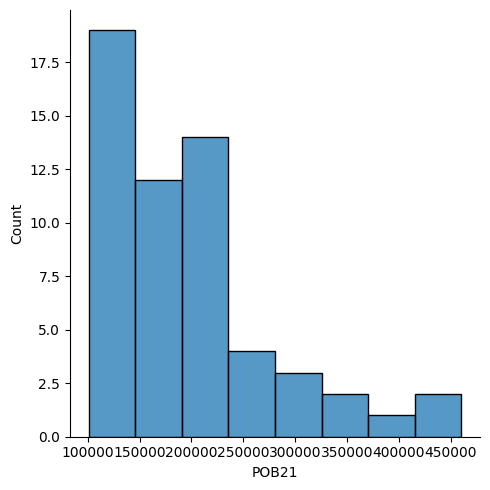

In [26]:
sns.displot(key_partition, x="POB21")

In [27]:
key_partition

,CPRO,PROVINCIA,CMUN,NOMBRE,POB21,HOMBRES,MUJERES
2,2,Albacete,3,Albacete,172722,84365,88357
99,3,Alicante/Alacant,14,Alicante/Alacant,337304,163052,174252
151,3,Alicante/Alacant,65,Elche/Elx,234205,116222,117983
240,4,Almería,13,Almería,200753,98141,102612
376,1,Araba/Álava,59,Vitoria-Gasteiz,253093,123092,130001
405,33,Asturias,24,Gijón,268896,126485,142411
424,33,Asturias,44,Oviedo,217552,100622,116930
722,6,Badajoz,15,Badajoz,150610,72942,77668
915,7,"Balears, Illes",40,Palma,419366,205249,214117
954,8,Barcelona,15,Badalona,223006,110001,113005


In [28]:
lower = key_partition["POB21"][key_partition["POB21"] <= 250000].sum()
upper = key_partition["POB21"][key_partition["POB21"] > 250000].sum()

In [30]:
print(f' High {round(high_service["POB21"].sum() + upper, 2)/ total_population * 100}') 
print(f' Low {round(low_service["POB21"].sum() + lower, 2)/ total_population * 100}') 

 High 23.870901040700403
 Low 76.1290989592996


##### Conclusion 3: More variables

According to just population we can assume that 76.12% live in less populated areas. However we have not included characteristics (ages, number of working people etc) and the city characteristics (sparsity, public transport level, number of working people, ...). The only proxy for service level is the number of habitants. 